In [4]:
import pandas as pd

# Load the dataset
file_path = '/content/winequality-red-folds.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7,0
1,9.4,0.685,0.11,2.7,0.077,6.0,31.0,0.99840,3.19,0.70,10.1,6,0
2,10.2,0.230,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,4,0
3,7.3,0.730,0.24,1.9,0.108,18.0,102.0,0.99670,3.26,0.59,9.3,5,0
4,8.0,0.620,0.35,2.8,0.086,28.0,52.0,0.99700,3.31,0.62,10.8,5,0


#Задача №17: Нормализация с использованием преобразования Йео-Джонсона
Для этого выберем произвольный числовой признак. Пусть это будет колонка fixed acidity.

In [12]:
from sklearn.preprocessing import PowerTransformer

# Преобразование Йео-Джонсона для колонки 'fixed acidity'
yeo_transformer = PowerTransformer(method='yeo-johnson')
data['fixed acidity Yeo-Johnson'] = yeo_transformer.fit_transform(data[['fixed acidity']])

# Сравним исходное и преобразованное значение
data[['fixed acidity', 'fixed acidity Yeo-Johnson']].head()

,fixed acidity,fixed acidity Yeo-Johnson
0,8.9,0.501915
1,9.4,0.759714
2,10.2,1.127136
3,7.3,-0.516971
4,8.0,-0.029436


#Задача №37: Отбор признаков с использованием класса SelectPercentile и метода на основе взаимной информации

In [13]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

# Отбор признаков
X = data.drop(columns=['quality', 'kfold'])
y = data['quality']

selector = SelectPercentile(mutual_info_regression, percentile=5)
X_selected = selector.fit_transform(X, y)

# Выбранные признаки
selected_features = X.columns[selector.get_support()]

# Вывод выбранных признаков
print(selected_features)


Index(['alcohol'], dtype='object')


Построим гистограмму для произвольной колонки данных. Пусть это будет колонка alcohol.

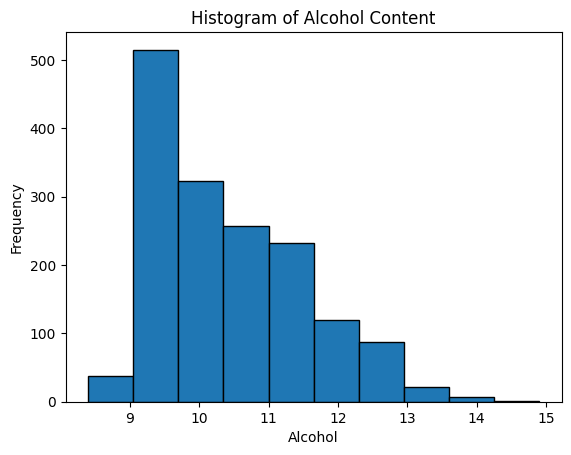

In [7]:
import matplotlib.pyplot as plt

# Построение гистограммы
plt.hist(data['alcohol'], bins=10, edgecolor='black')
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()
